In [3]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt

In [10]:
# PostgreSQL connection setup
conn = psycopg2.connect(
    dbname="movie_data",
    user="postgres",
    password="mlip-007",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

In [11]:
# Load user metadata
def load_user():
    try:
        query = """
        SELECT user_id, age, gender
        FROM users
        WHERE age IS NOT NULL AND gender IS NOT NULL
        """
        cursor.execute(query)
        data = cursor.fetchall()

        print(f"Loaded {len(data)} user records successfully.")
        return pd.DataFrame(data, columns=['user_id', 'age', 'gender'])
    except Exception as e:
        print(f"Error loading user data: {e}")
        conn.rollback()  # Rollback the transaction
        return pd.DataFrame()  # Return an empty DataFrame

# Load movie metadata
def load_movie():
    try:
        query = """
        SELECT movie_id, genres
        FROM movies
        WHERE genres IS NOT NULL
        """
        cursor.execute(query)
        data = cursor.fetchall()

        print(f"Loaded {len(data)} movie records successfully.")
        return pd.DataFrame(data, columns=['movie_id', 'genres'])
    except Exception as e:
        print(f"Error loading movie data: {e}")
        conn.rollback()
        return pd.DataFrame()

# Load ratings data
def load_ratings():
    try:
        query = """
        SELECT user_id, movie_id, rating
        FROM user_ratings
        WHERE rating IS NOT NULL
        """
        cursor.execute(query)
        data = cursor.fetchall()

        print(f"Loaded {len(data)} rating records successfully.")
        return pd.DataFrame(data, columns=['user_id', 'movie_id', 'rating'])
    except Exception as e:
        print(f"Error loading ratings data: {e}")
        conn.rollback()
        return pd.DataFrame()

# Load user movie interactions
def load_user_movie():
    try:
        query = """
        SELECT user_id, movie_id, last_interaction, count
        FROM user_movie_interaction
        WHERE last_interaction IS NOT NULL
        """
        cursor.execute(query)
        data = cursor.fetchall()

        print(f"Loaded {len(data)} user_movie_interaction records successfully.")
        return pd.DataFrame(data, columns=['user_id', 'movie_id', 'last_interaction', 'count'])
    except Exception as e:
        print(f"Error loading user-movie interaction data: {e}")
        conn.rollback()
        return pd.DataFrame()

user_data = load_user()
movie_data = load_movie()
ratings_data = load_ratings()
user_movie_data = load_user_movie()

# Close the database connection
cursor.close()
conn.close()

Loaded 180354 user records successfully.
Loaded 26779 movie records successfully.
Loaded 22343 rating records successfully.
Loaded 21466 user_movie_interaction records successfully.


In [ ]:
print(user_data.head()) 
print(movie_data.head())
print(ratings_data.head())
print(user_movie_data.head()) 

  user_id  age gender
0    9899   33      M
1   75211   26      F
2   93144   27      M
3  133262   31      F
4   75978   32      M
                           movie_id                             genres
0                        trash+2014  Adventure, Crime, Drama, Thriller
1                     ceremony+2010                    Comedy, Romance
2           the+imitation+game+2014      History, Drama, Thriller, War
3  the+hunchback+of+notre+dame+1996           Drama, Animation, Family
4            kronks+new+groove+2005          Animation, Comedy, Family
  user_id                                     movie_id rating
0   94843                     the+devils+backbone+2001      5
1   76286                             afghan+luke+2011      4
2   53616                             school+ties+1992      4
3   61086                     keeping+the+promise+1997      3
4  133003  lady+and+the+tramp+ii+scamps+adventure+2001      3
  user_id                     movie_id    last_interaction  count
0   

#### Step 1: Merge datasets

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge movie interaction data with genre info
merged_data = user_movie_data.merge(movie_data, on='movie_id', how='left')

#### Step 2: Plot recommendation frequency

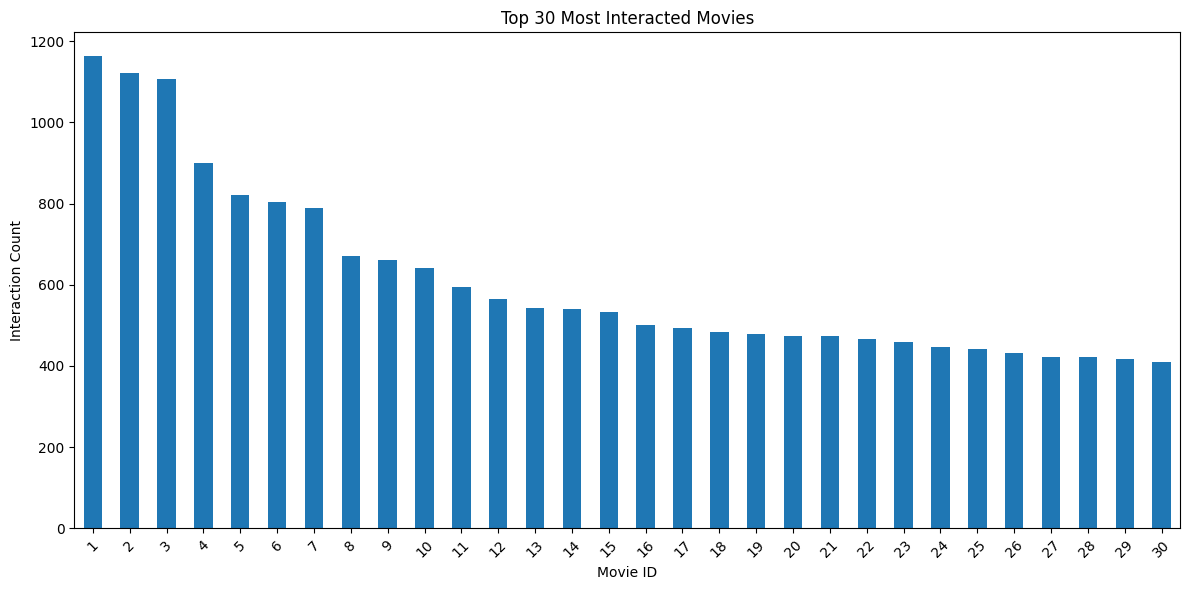

In [26]:
# Count how many times each movie was interacted with
movie_popularity = merged_data.groupby("movie_id")["count"].sum().sort_values(ascending=False)

# Plot top 30 movies
plt.figure(figsize=(12, 6))
movie_popularity.head(30).plot(kind='bar')
plt.title("Top 30 Most Interacted Movies")
plt.xlabel("Movie ID")
plt.ylabel("Interaction Count")
plt.xticks(range(30), range(1, 31), rotation=45)
plt.tight_layout()
plt.show()

#### Step 3: Check long tail distribution

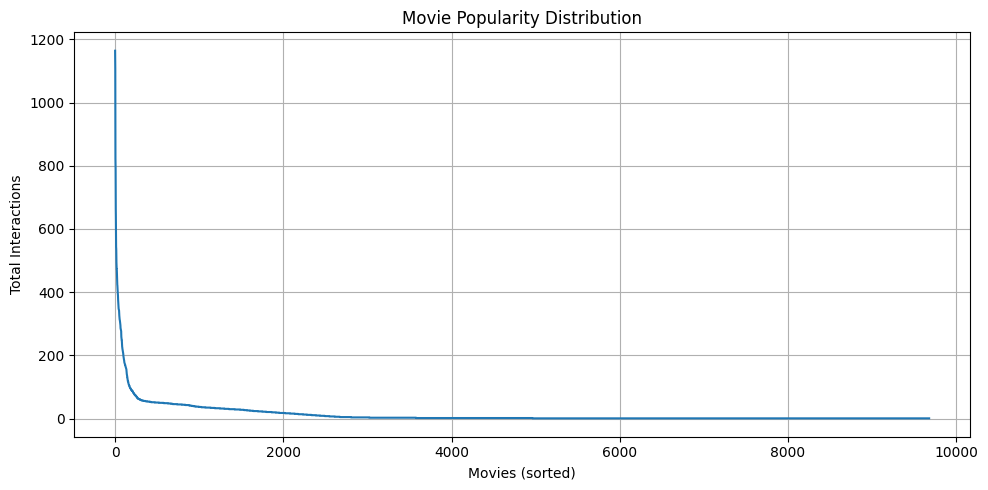

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(movie_popularity.values)
plt.title("Movie Popularity Distribution")
plt.ylabel("Total Interactions")
plt.xlabel("Movies (sorted)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Explore by genre

Identify whether the model is favoring certain genres unfairly.

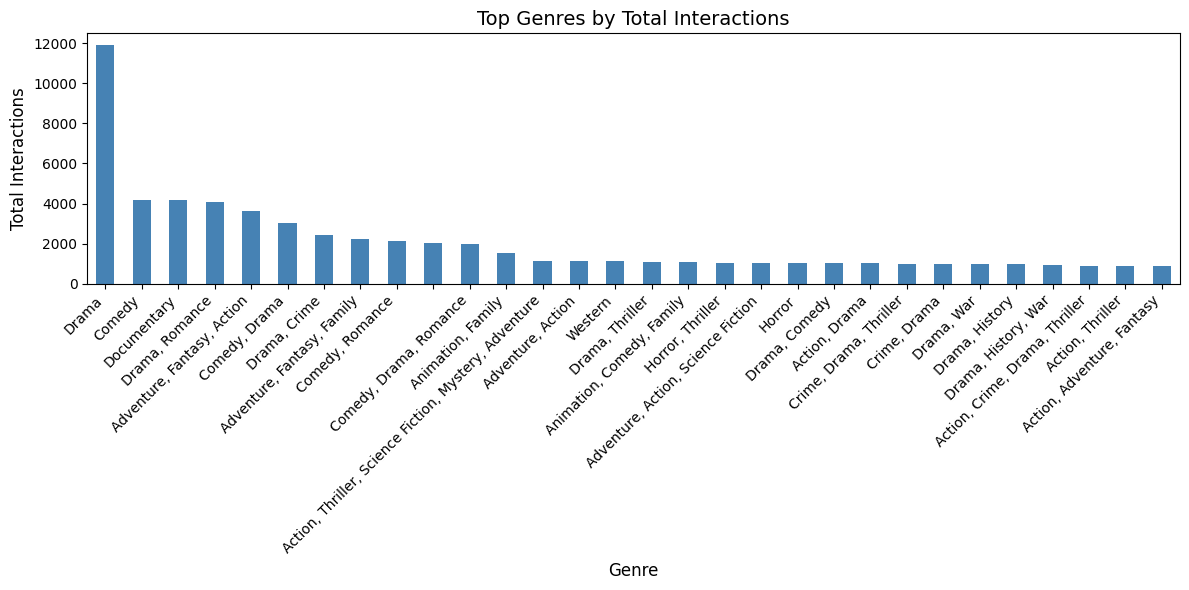

In [32]:
top_n = 30
genre_popularity = merged_data.groupby("genres")["count"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_popularity.head(top_n).plot(kind='bar', color='steelblue')

plt.title("Top Genres by Total Interactions", fontsize=14)
plt.ylabel("Total Interactions", fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()